In [17]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.recurrent import SimpleRNN, LSTM, GRU
from keras.utils import np_utils
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
(x_train , y_train),(x_test , y_test) = mnist.load_data()
nb_classes = 10 # 類別的數目
img_rows, img_cols = 28, 28 # 圖片的長與寬
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
nb_units = 50
model = Sequential()
model.add(LSTM(nb_units, input_shape=(img_rows, img_cols)))
model.add(Dense(units=nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50)                15800     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 16,310
Trainable params: 16,310
Non-trainable params: 0
_________________________________________________________________


In [18]:
epochs = 10
history = model.fit(x_train, y_train, epochs=epochs, batch_size=128, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 6s 95us/step - loss: 2.2608 - acc: 0.2051
Epoch 2/10
60000/60000 [==============================] - 5s 89us/step - loss: 2.1107 - acc: 0.2458
Epoch 3/10
60000/60000 [==============================] - 5s 88us/step - loss: 1.9391 - acc: 0.3290
Epoch 4/10
60000/60000 [==============================] - 5s 86us/step - loss: 1.7243 - acc: 0.4248
Epoch 5/10
60000/60000 [==============================] - 5s 88us/step - loss: 1.4962 - acc: 0.4978
Epoch 6/10
60000/60000 [==============================] - 5s 88us/step - loss: 1.2770 - acc: 0.5926
Epoch 7/10
60000/60000 [==============================] - 5s 87us/step - loss: 1.0696 - acc: 0.6704
Epoch 8/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.8933 - acc: 0.7214
Epoch 9/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.7571 - acc: 0.7616
Epoch 10/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.6581 - acc: 0.7927

accuracy = 81.63%


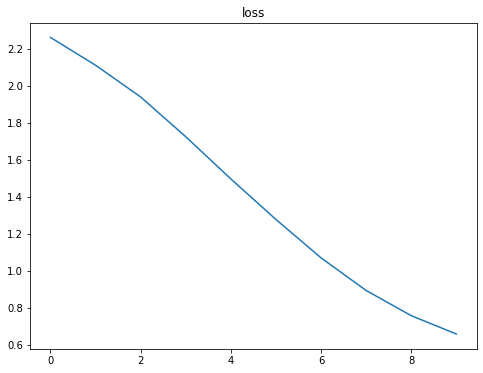

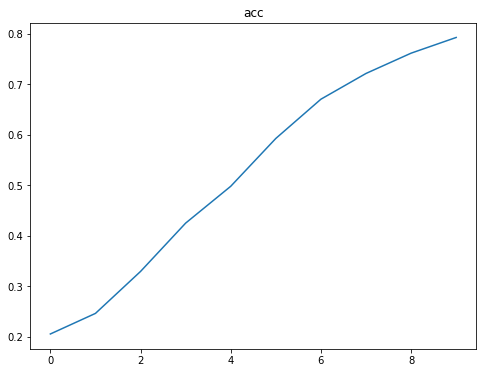

In [19]:
plt.figure(figsize=(8,6))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(8,6))
plt.plot(history.epoch,history.history['acc'])
plt.title('acc');

scores = model.evaluate(x_test, y_test, verbose=2)
print("accuracy = {:2.2f}%".format(scores[1]*100.0))

In [28]:
(x_train , y_train),(x_test , y_test) = mnist.load_data()
nb_classes = 10 # 類別的數目
img_rows, img_cols = 28, 28 # 圖片的長與寬
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
nb_units = 128
model = Sequential()
model.add(LSTM(nb_units, input_shape=(img_rows, img_cols)))
model.add(Dense(units=nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 128)               80384     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [29]:
epochs = 10
history = model.fit(x_train, y_train, epochs=epochs, batch_size=128, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.5188 - acc: 0.8315
Epoch 2/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.1548 - acc: 0.9534
Epoch 3/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.1041 - acc: 0.9684
Epoch 4/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.0850 - acc: 0.9740
Epoch 5/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0643 - acc: 0.9801
Epoch 6/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.0568 - acc: 0.9824
Epoch 7/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.0450 - acc: 0.9864
Epoch 8/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0409 - acc: 0.9872
Epoch 9/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0347 - acc: 0.9893
Epoch 10/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0301 - a

accuracy = 98.39%


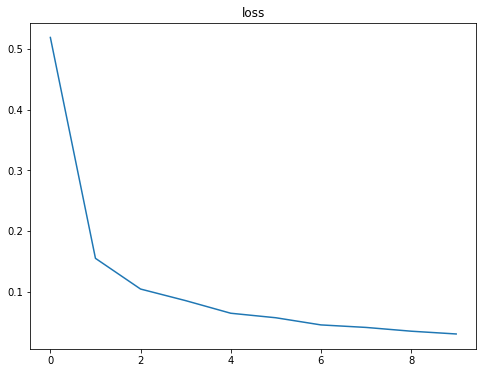

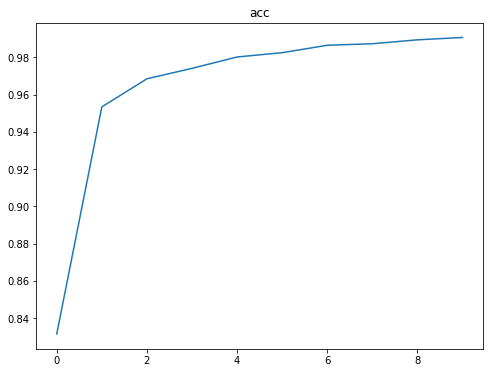

In [30]:
plt.figure(figsize=(8,6))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(8,6))
plt.plot(history.epoch,history.history['acc'])
plt.title('acc');

scores = model.evaluate(x_test, y_test, verbose=2)
print("accuracy = {:2.2f}%".format(scores[1]*100.0))